<h1>House Price Prediction</h1>

The cell below imports the necessary libraries: pandas for data manipulation, seaborn for data visualization, and matplotlib for plotting. The %matplotlib inline magic command ensures that the plots are displayed inline in the Jupyter Notebook.

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset and display the first few rows:
kc_data = pd.read_csv("C:/Users/Ola/Desktop/320 project/dataset/kc_house_data.csv")
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
kc_data.shape

(21613, 21)

In [3]:
kc_data.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Display information about the dataset, including the column names, data types, and the number of non-null values in each column.

In [4]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
kc_data.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Descriptive statistics of the numerical columns in the dataset, including count, mean, standard deviation, minimum, quartiles, and maximum values.

In [6]:
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#  Check for missing values in the dataset
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
kc_data.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [9]:
# kc_data.drop(['id','date','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15','grade'], axis='columns', inplace=True)

The cell above removes the specified columns from the dataset, which are considered unnecessary for the analysis.

In [10]:
kc_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<h2>Exploratory Data Analysis</h2>

<strong>Scatter Plot</strong><br>
A scatter plot to visualize the relationship between the number of bedrooms and bathrooms in the house

Text(0, 0.5, 'bathrooms')

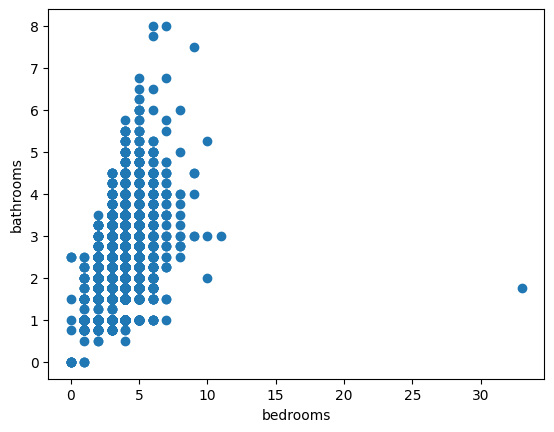

In [11]:
plt.scatter(kc_data.bedrooms, kc_data.bathrooms)
plt.xlabel("bedrooms")
plt.ylabel('bathrooms')

Relationship between the condition of the houses and the view they have

Text(0, 0.5, 'view')

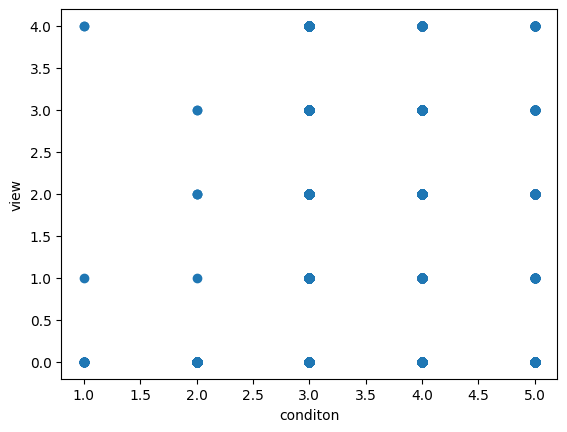

In [12]:
plt.scatter(kc_data.condition, kc_data.view)
plt.xlabel("conditon")
plt.ylabel('view')

In [13]:
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
kc_data.shape

(21613, 21)

<h2>Feature Engineering</h2>

In [15]:
# Filter out houses with an unrealistic number of bedrooms from the scatter plot
dataset=kc_data[kc_data['bedrooms']<33]

In [16]:
# Calculate the age of the house in years
import numpy as np
dataset['yr_old'] = 2023 - dataset.yr_built 
# Create a binary column indicating whether the house has been renovated or not
dataset['renovated_status'] = np.where(dataset['yr_renovated'] > 0, 1, 0)

C:\Users\Ola\AppData\Local\Temp\ipykernel_10756\2964903153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['yr_old'] = 2023 - dataset.yr_built
C:\Users\Ola\AppData\Local\Temp\ipykernel_10756\2964903153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['renovated_status'] = np.where(dataset['yr_renovated'] > 0, 1, 0)


the cell above creates two new columns in the dataset: 'yr_old', which represents the age of the house in years, and 'renovated_status', which indicates whether a house has been renovated or not based on the 'yr_renovated' column.

In [17]:
dataset.price = dataset.price.astype(int)
dataset.head()

C:\Users\Ola\AppData\Local\Temp\ipykernel_10756\270607020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.price = dataset.price.astype(int)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,renovated_status
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,68,0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,72,1
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,90,0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,58,0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,36,0


In [18]:
# Drop unnecessary columns that wont be needed any longer
dataset.drop(['yr_built','yr_renovated'], axis=1, inplace=True)


C:\Users\Ola\AppData\Local\Temp\ipykernel_10756\2674636415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['yr_built','yr_renovated'], axis=1, inplace=True)


In [19]:
dataset.head() #disply first few rows of the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,renovated_status
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,98178,47.5112,-122.257,1340,5650,68,0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,98125,47.7210,-122.319,1690,7639,72,1
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,98028,47.7379,-122.233,2720,8062,90,0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,98136,47.5208,-122.393,1360,5000,58,0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,98074,47.6168,-122.045,1800,7503,36,0


In [20]:
# Splitting into x and y dataset
y=dataset['price']
x= dataset.drop(columns=["price","id","lat","long",'id','date','sqft_living15','sqft_lot15'])

In [21]:
# x = kc_cleaned.drop(['price'], axis=1)
# y = kc_cleaned.price

In [22]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,yr_old,renovated_status
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,68,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,72,1
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,90,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,58,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,14,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,9,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,14,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,19,0


In [23]:
y


0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21612, dtype: int32

 the cleaned dataset gets split into input features (x) and the target variable (y), where 'x' contains all the columns except 'price' and 'y' contains only the 'price' column.

In [24]:
# Split the data into training and testing sets:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=40)

the cell above splits the input features and target variable into training and testing sets, with 70% of the data used for training and 30% for testing. The random_state parameter ensures reproducibility of the split.

In [25]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,yr_old,renovated_status
3257,4,3.75,2930,3200,1.5,0,0,5,9,2130,800,98119,98,0
12653,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,98065,24,0
6481,4,2.75,2910,6308,1.0,0,0,3,8,1640,1270,98011,38,0
4950,5,2.25,2340,9225,2.0,0,0,3,8,2340,0,98052,50,0
9559,3,1.75,1550,7200,1.0,0,0,3,7,1100,450,98125,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,5,2.75,2930,31411,1.0,0,0,4,9,1520,1410,98006,48,0
16066,2,1.00,750,6350,1.0,0,0,3,5,750,0,98103,103,0
14501,3,1.00,1150,6480,1.5,0,0,4,5,1150,0,98001,77,0
14555,3,1.75,2460,4240,1.0,0,0,4,7,1230,1230,98103,98,0


<h2>Linear Regression</h2>

In [26]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression() # creates a Linear Regression model,
lin.fit(x_train, y_train) #fits it to the training data
lin.score(x_test,y_test) #calculates the R^2 score

0.6460720910408875

<h2>Polynomial Regression</h2>

In [27]:
#converting x to polynomial to check the status of polynomial regression
from sklearn.preprocessing import PolynomialFeatures
polyreg=PolynomialFeatures(degree=2)
x_poly=polyreg.fit_transform(x_train)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)


LinearRegression()

In [28]:
# Transform the testing data to polynomial features and calculate the R^2 score of the Polynomial Regression model
x_test_poly = polyreg.fit_transform(x_test)
lin_reg2.score(x_test_poly, y_test)

0.7223031661507004

In [29]:
ypred1 = lin.predict(x_test) #output from Linear Regression
ypred2=  lin_reg2.predict(polyreg.fit_transform(x_test)) #Output from Polynomial Regression
from sklearn.metrics import r2_score
lin_score= r2_score(y_test,ypred1)#Score from Linear Regression
poly_score=r2_score(y_test,ypred2)#Score from Polynomial Regression
print('Score for MultiLinear Regression',str(lin_score),'\n','Score for Polynomial Regression',str(poly_score))



Score for MultiLinear Regression 0.6460720910408875 
 Score for Polynomial Regression 0.7223031661507004


Calculate the root mean squared error (RMSE) for both the linear regression and polynomial regression models.

In [30]:
from sklearn.metrics import mean_squared_error

rmse1 = np.sqrt(mean_squared_error(y_test, ypred1))
rmse2 = np.sqrt(mean_squared_error(y_test, ypred2))

print(rmse1, rmse2)


209534.63382320912 185602.52337692658


Visualize the predicted prices from both models compared to the actual prices using scatter plots.

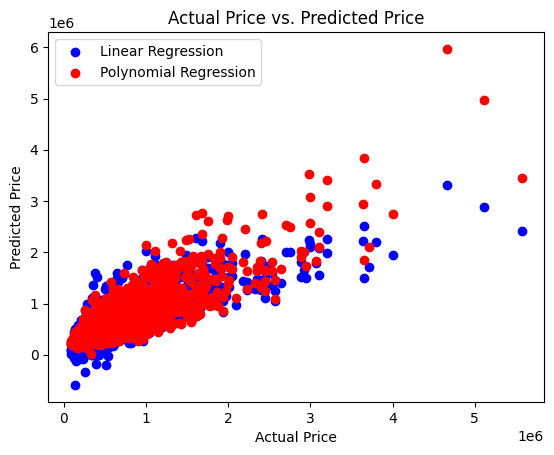

In [31]:
plt.scatter(y_test, ypred1, color='blue', label='Linear Regression')
plt.scatter(y_test, ypred2, color='red', label='Polynomial Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')
plt.legend()
plt.show()


<h2>Decision Tree Regressor, SVR</h2>

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

derc = DecisionTreeRegressor()
derc.fit(x_train,y_train)

y_p = derc.predict(x_test)
dec_score = r2_score(y_test,y_p)

svr = SVR()
svr.fit(x_train,y_train)
s_p = svr.predict(x_test)
svr_score = r2_score(y_test,s_p)

print("derc score:", dec_score)
print("svr score:",svr_score)



derc score: 0.6427888574346349
svr score: -0.05815753373133736


<h2>Random Forest Regressor</h2>

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model and fit it to the training data
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Calculate the R^2 score of the Random Forest Regression model on the testing data
rf_pre = rf.predict(x_test)
rf_score = r2_score(y_test,rf_pre)
print("RandomForestRegressor score:", rf_score)


RandomForestRegressor score: 0.8234855123222473


<h2>XGBoost</h2>

In [34]:
#boosting accuracy
from xgboost import XGBRegressor
# Create an XGBoost Regressor model and fit it to the training data
regboost=XGBRegressor(learning_rate=0.3, max_depth=4, n_estimators=200)
regboost.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [35]:
# Predict on the testing data
yboost=regboost.predict(x_test)

# Calculate the R^2 score for XGBoost Regressor
from sklearn.metrics import r2_score
regboost_score= r2_score(y_test,yboost)
print("Score with XGBoost regboost=XGBRegressor(learning_rate=0.3, max_depth=4, n_estimators=200)",regboost_score)


Score with XGBoost regboost=XGBRegressor(learning_rate=0.3, max_depth=4, n_estimators=200) 0.8615486151491473


In [36]:
# Create an XGBoost Regressor model with different features and fit it to the training data
xg2 = XGBRegressor(colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=1500, verbosity=0)
xg2.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [37]:
y_pred5 = xg2.predict(x_test)

# Calculate the R^2 score for  the second XGBoost Regressor
xg2_score = r2_score(y_test,y_pred5)
print(" XGB with xg2 = XGBRegressor(colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=1000, verbosity=0) Score: ",xg2_score)

 XGB with xg2 = XGBRegressor(colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=1000, verbosity=0) Score:  0.8747028660854265


<h2>LightGBM</h2>

In [38]:
import lightgbm as lgb

# Define and train the LightGBM model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'num_leaves': 30,
    'learning_rate': 0.1,
    'n_estimators': 1000
}

lgb_model = lgb.LGBMRegressor(**params)
lgb_model.fit(x_train, y_train)

# Evaluate the model
score = lgb_model.predict(x_test)
lgb_score = r2_score(y_test,score)
print('Score for LightGBM:', lgb_score)


Score for LightGBM: 0.8646966418339402


<h2>Ensemble Model Stacking</h2>

In [39]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Define the base models
base_models = [
    ("XGBRegressor", XGBRegressor(colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=1000, verbosity=0)),  # Replace `model` with your trained LSTM model
    ('lightgbm', lgb.LGBMRegressor(**params)),  # Replace `params` with appropriate parameters for LightGBM
    ('linear_regression', LinearRegression()),
    ('rnadom_forest', RandomForestRegressor())
]

# Define the meta-model
meta_model = LinearRegression()

# Create the ensemble model
ensemble_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit the ensemble model
ensemble_model.fit(x_train, y_train)

# Evaluate the model
ems_pre = ensemble_model.predict(x_test)
ems_score= r2_score(y_test,ems_pre)
print('Score for Ensemble Model Stacking:', ems_score)



Score for Ensemble Model Stacking: 0.8782451585024138


<h2>Leveraging Long Short-Term Memory (LSTM) Neural Network</h2>

In [40]:
# # from keras.models import Sequential
# # from keras.layers import LSTM, Dense

# # # Define your LSTM model architecture
# # model = Sequential()
# # model.add(LSTM(units=128, input_shape=(x_train.shape[1], x_train.shape[2])))
# # model.add(Dense(units=1))

# # # Compile and train the model
# # model.compile(loss='mean_squared_error', optimizer='adam')
# # model.fit(x_train, y_train, epochs=50, batch_size=32)

# # # Evaluate the model
# # score = model.evaluate(x_test, y_test)
# # print('Score for LSTM model:', score)

from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

x_train_lstm = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test_lstm = x_test.values.reshape((x_test.shape[0], 1, x_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(1, x_train_lstm.shape[2])))
lstm_model.add(Dense(50, activation='sigmoid'))
lstm_model.add(Dense(10, activation='sigmoid'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

lstm_model.fit(x_train_lstm, y_train, epochs=10)

# Make predictions with the trained LSTM model
predictions_lstm = lstm_model.predict(x_test_lstm)

# Evaluate the LSTM model
loss_lstm, accuracy_lstm = lstm_model.evaluate(x_test_lstm, y_test)
print(f"LSTM Model - Loss: {loss_lstm}, Accuracy: {accuracy_lstm}")


Epoch 1/10
473/473 [==============================] - 11s 4ms/step - loss: 542268.0625 - accuracy: 0.0000e+00
Epoch 2/10
473/473 [==============================] - 3s 5ms/step - loss: 542267.6875 - accuracy: 0.0000e+00
Epoch 3/10
473/473 [==============================] - 2s 4ms/step - loss: 542268.0000 - accuracy: 0.0000e+00
Epoch 4/10
473/473 [==============================] - 2s 4ms/step - loss: 542268.0625 - accuracy: 0.0000e+00
Epoch 5/10
473/473 [==============================] - 2s 4ms/step - loss: 542267.5625 - accuracy: 0.0000e+00
Epoch 6/10
473/473 [==============================] - 2s 4ms/step - loss: 542268.0000 - accuracy: 0.0000e+00
Epoch 7/10
473/473 [==============================] - 2s 4ms/step - loss: 542267.9375 - accuracy: 0.0000e+00
Epoch 8/10
473/473 [==============================] - 2s 4ms/step - loss: 542267.7500 - accuracy: 0.0000e+00
Epoch 9/10
473/473 [==============================] - 2s 4ms/step - loss: 542268.0000 - accuracy: 0.0000e+00
Epoch 10/10
203/20

In [41]:
from sklearn.linear_model import Lasso

# Assuming 'X' is your feature matrix and 'y' is your target variable
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso.fit(x_train, y_train)

# Access the coefficients of the selected features
selected_features = lasso.coef_

lasso_score = lasso.score(x_test, y_test)
lasso_score

c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.352e+14, tolerance: 2.108e+11
  model = cd_fast.enet_coordinate_descent(


0.646072492291845

In [42]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

# Apply a transformer to the input features (x_train)
transformer = PowerTransformer()
x_train_transformed = transformer.fit_transform(x_train)

# Create the TransformedRegressor using LinearRegression as the base regressor
transformed_reg = TransformedTargetRegressor(regressor=LinearRegression())

# Fit the TransformedRegressor to the transformed training data
transformed_reg.fit(x_train_transformed, y_train)

# Transform the testing data using the same transformer
x_test_transformed = transformer.transform(x_test)

# Predict on the transformed testing data
y_pred = transformed_reg.predict(x_test_transformed)

# Calculate the R2 score
transformed_reg_score = r2_score(y_test, y_pred)
print(f"R2 Score: {transformed_reg_score}")


R2 Score: 0.5512117233755207


In [43]:
models = [lin,polyreg,derc,svr,rf,regboost,xg2,lgb_model,ensemble_model,lstm_model,lasso,transformed_reg]
models_scores = [lin_score,poly_score,dec_score,svr_score,rf_score,regboost_score,xg2_score,lgb_score,ems_score,accuracy_lstm,lasso_score,transformed_reg_score]
combined_data = {'Regression Models' : models, "Scores": models_scores}
models_df = pd.DataFrame(combined_data)
models_df

,Regression Models,Scores
0,LinearRegression(),0.646072
1,PolynomialFeatures(),0.722303
2,DecisionTreeRegressor(),0.642789
3,SVR(),-0.058158
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.823486
5,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.861549
6,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.874703
7,"LGBMRegressor(n_estimators=1000, num_leaves=30...",0.864697
8,"StackingRegressor(estimators=[('XGBRegressor',...",0.878245
9,<keras.engine.sequential.Sequential object at ...,0.000000


The second XGB Regressor model (xg2) performed best out of all models, hence it is suitable for the house price model

In [44]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,yr_old,renovated_status
3257,4,3.75,2930,3200,1.5,0,0,5,9,2130,800,98119,98,0
12653,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,98065,24,0
6481,4,2.75,2910,6308,1.0,0,0,3,8,1640,1270,98011,38,0
4950,5,2.25,2340,9225,2.0,0,0,3,8,2340,0,98052,50,0
9559,3,1.75,1550,7200,1.0,0,0,3,7,1100,450,98125,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,5,2.75,2930,31411,1.0,0,0,4,9,1520,1410,98006,48,0
16066,2,1.00,750,6350,1.0,0,0,3,5,750,0,98103,103,0
14501,3,1.00,1150,6480,1.5,0,0,4,5,1150,0,98001,77,0
14555,3,1.75,2460,4240,1.0,0,0,4,7,1230,1230,98103,98,0


In [45]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_old', 'renovated_status'],
      dtype='object')

In [46]:
inputs = (3,1.00,1180,5650,1.0,0,0,3,7,1180,0,68,0,98178)

input_data_as_numpy_array = np.asarray(inputs)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = xg2.predict(input_data_reshaped)
print(prediction)




[276969.03]


In [47]:
def predict_price(bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,yr_old,renovated_status):

    inputs = [bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,yr_old,renovated_status]
    1,-1
    # convert the inputs to numpy array
    inputs_to_numpy = np.asarray(inputs)

    reshape_inputs = inputs_to_numpy.reshape(1,-1)

    make_prediction = xg2.predict(reshape_inputs)

    return ("${}".format(make_prediction))

In [48]:
predict_price(3,1.00,1180,5650,1.0,0,0,3,7,1180,0,68,0,98178)

'$[276969.03]'

In [49]:
xg2.feature_names_in_
ensemble_model.feature_names_in_

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'yr_old', 'renovated_status'],
      dtype=object)

Save the model to a joblib file whichh will be used for deployment

In [50]:
import joblib

joblib.dump(xg2,'KcHouse.joblib')


['KcHouse.joblib']